In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

## Figure: PCA

In [13]:
S = X['EMBED'].to_list()

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [22]:
X_reduced = PCA(n_components=2).fit_transform(X['EMBED'].to_list())


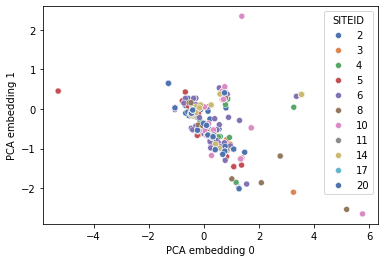

In [33]:
df = pd.read_csv('/scratch/users/benson97/' + 'rif_labels.csv')
X_reduced = PCA(n_components=2).fit_transform(X['EMBED'].to_list())

location = []
for uniqueid in df['UNIQUEID']:
    location.append(int(uniqueid.split('.')[1]))
df = pd.concat(
    [df, pd.DataFrame({'SITEID':location})],
    axis=1
)

df = pd.concat([df, pd.DataFrame({'EMBED_0': X_reduced[:, 0], 'EMBED_1': X_reduced[:, 1]})], axis=1)

viz = df

viz = viz.rename(columns={
    'EMBED_0':'PCA embedding 0',
    'EMBED_1':'PCA embedding 1',
    'RIF_BINARY_PHENOTYPE':'RIF status'
})

ax = sns.scatterplot(data=viz,
                x='PCA embedding 0', 
                y='PCA embedding 1',
                hue='SITEID',
                palette='deep'
           )

plt.savefig('figure_pca_site_385.png', dpi=1000)

In [30]:
statistics = np.load('report500.npy', allow_pickle=True)

In [32]:
statistics[385]

{'0': {'precision': 0.72870249017038,
  'recall': 0.7493261455525606,
  'f1-score': 0.7388704318936877,
  'support': 742.0},
 '1': {'precision': 0.581081081081081,
  'recall': 0.5548387096774193,
  'f1-score': 0.5676567656765676,
  'support': 465.0},
 'accuracy': 0.6743993371996686,
 'macro avg': {'precision': 0.6548917856257306,
  'recall': 0.6520824276149899,
  'f1-score': 0.6532635987851276,
  'support': 1207.0},
 'weighted avg': {'precision': 0.6718309448294322,
  'recall': 0.6743993371996686,
  'f1-score': 0.6729099059691137,
  'support': 1207.0}}

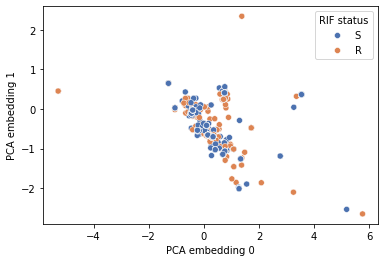

In [34]:
ax = sns.scatterplot(data=viz,
                x='PCA embedding 0', 
                y='PCA embedding 1',
                hue='RIF status',
                palette='deep'
           )

plt.savefig('figure_pca_label_385.png', dpi=1000)

In [26]:
ax

<Axes: xlabel='PCA embedding 0', ylabel='PCA embedding 1'>

In [20]:
location = []
for uniqueid in df['UNIQUEID']:
    location.append(int(uniqueid.split('.')[1]))
df = pd.concat(
    [df, pd.DataFrame({'SITEID':location})],
    axis=1
)

## Figure: UMAP

In [2]:
import umap
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

mypath = '/scratch/users/benson97/embeddings_rif/'
df = pd.read_csv('/scratch/users/benson97/' + 'rif_labels.csv')

import os

def get_site(uniqueid):
    return uniqueid.split('.')[1]

X = []
label = []
for uniqueid in tqdm(df['UNIQUEID']):
    if not os.path.exists(mypath + 'site_' + get_site(uniqueid) + '/' + uniqueid + '.npy'):
        print('Oh no! ' + uniqueid + ' is missing!')
    else:
        X.append(
            np.load(mypath + 'site_' + get_site(uniqueid) + '/' + uniqueid + '.npy')[385]
        )
        
X = pd.DataFrame({'EMBED':X})

100%|██████████| 12072/12072 [06:39<00:00, 30.21it/s]


/home/users/benson97/.local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


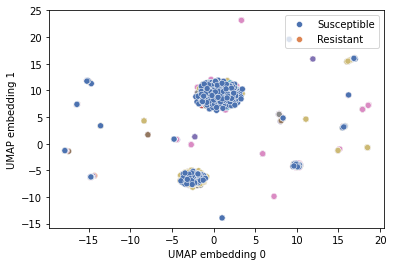

In [3]:
df = pd.read_csv('/scratch/users/benson97/' + 'rif_labels.csv')

reducer = umap.UMAP()
scaled_data = StandardScaler().fit_transform(X['EMBED'].to_list())
embedding = reducer.fit_transform(scaled_data)

location = []
for uniqueid in df['UNIQUEID']:
    location.append(int(uniqueid.split('.')[1]))
df = pd.concat(
    [df, pd.DataFrame({'SITEID':location})],
    axis=1
)

df = pd.concat([df, pd.DataFrame({'EMBED_0': embedding[:, 0], 'EMBED_1': embedding[:, 1]})], axis=1)

viz = df

viz = viz.rename(columns={
    'EMBED_0':'UMAP embedding 0',
    'EMBED_1':'UMAP embedding 1',
    'RIF_BINARY_PHENOTYPE':'RIF status'
})

ax = sns.scatterplot(data=viz,
                x='UMAP embedding 0', 
                y='UMAP embedding 1',
                hue='SITEID',
                palette='deep'
           )

# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(handles, ['Susceptible', 'Resistant'], loc='upper right')
plt.savefig('figure_umap_site_385.png', dpi=1000)

# from sklearn.cluster import KMeans
# kmeans_preds = (
#     KMeans(n_clusters=2, random_state=0, n_init="auto")
#     .fit_predict(embedding)
# )

# from sklearn.metrics import classification_report
# labels = [0 if x=='S' else 1 for x in viz['RIF status'] ]
# print(classification_report(
#     labels, 
#     kmeans_preds,
#     output_dict=True
# ))

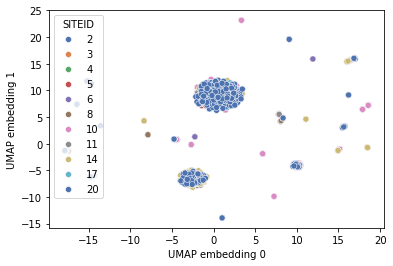

In [5]:
ax = sns.scatterplot(data=viz,
                x='UMAP embedding 0', 
                y='UMAP embedding 1',
                hue='SITEID',
                palette='deep'
           )
plt.savefig('figure_umap_site_385.png', dpi=1000)

## Figure: Variation in sub-embedding performance

In [48]:
report = np.load('report500.npy', allow_pickle=True)

def get_results(report, key, subkey):
    data = []
    for r in report:
        data.append(r[key][subkey])
    return data

df = pd.concat(
    [
        pd.DataFrame({'score': get_results(report, '0', 'recall'),
                     'metric': ['specificity' for _ in range(500)]}),
        pd.DataFrame({'score': get_results(report, '1', 'recall'),
                     'metric': ['sensitivity' for _ in range(500)]}),      
    ],
    axis=0
)
df = (
    df.reset_index()
    .rename(columns={'index':'sub-embedding #'})
)

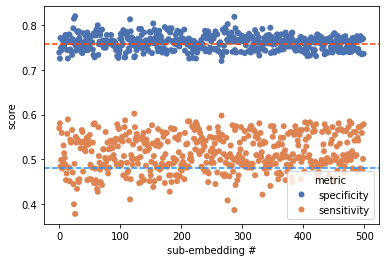

In [49]:
ax = sns.scatterplot(data=df, 
                x='sub-embedding #', 
                y='score', 
                hue='metric',
                palette='deep',
                edgecolor='none'
)

ax.axhline(y = 0.4805,  
           xmin = 0, 
           xmax = 1,
          color='dodgerblue',
          linestyle='dashed')

ax.axhline(y = 0.7569,  
           xmin = 0, 
           xmax = 1,
           color='orangered',
          linestyle='dashed')

plt.savefig('figure_subemb_sens_spec.png', dpi=1000)

## Figure: Standard deviation of log-likelihoods

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

basedir = '/scratch/users/benson97'
seqs = np.load(basedir + '/rif_seqs.npy')
uniqueids = np.load(basedir + '/rif_unique_ids.npy')
labels = pd.read_csv(basedir + '/rif_labels.csv')

temp = pd.concat([
    pd.DataFrame({'UNIQUEID': uniqueids}),
    pd.DataFrame({'SEQ': seqs})
], axis=1)

df = pd.merge(labels, temp, on='UNIQUEID', how='left')

log_probs = []
for row in np.load(basedir + '/rif_log_prob_0_500.npy'):
    log_probs.append(row[0])
    
df = pd.concat(
    [df, pd.DataFrame({'LOGPROB':log_probs})],
    axis=1
)

# split our data into two sub-groups
res_df = df[df.RIF_BINARY_PHENOTYPE == 'R']
sus_df = df[df.RIF_BINARY_PHENOTYPE == 'S']

# calculate the std of each sub-embedding
logprob_res = np.std(res_df['LOGPROB'].to_list(), axis=0)
logprob_sus = np.std(sus_df['LOGPROB'].to_list(), axis=0)

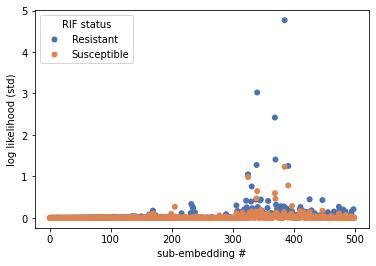

In [42]:
tempR = pd.DataFrame(
    {
        'log likelihood (std)': logprob_res,
        'RIF status': ['Resistant' for _ in range(len(logprob_res))]
    }
)

tempS = pd.DataFrame(
    {
        'log likelihood (std)': logprob_sus,
        'RIF status': ['Susceptible' for _ in range(len(logprob_sus))]
    }
)

df_viz = (
        pd.concat([tempR, tempS],axis=0)
            .reset_index()
            .rename(columns={'index':'sub-embedding #'})
)

sns.scatterplot(data=df_viz, 
                x='sub-embedding #', 
                y='log likelihood (std)', 
                hue='RIF status',
                palette='deep',
                edgecolor='none'
)

plt.savefig('figure_loglikelihood_std.png', dpi=1000)

In [ ]:

# A list of frequent variants (cut off = 10)
# [(325, Counter({'T': 12122, 'C': 126, 'G': 11})),
#  (330, Counter({'C': 12244, 'A': 14, 'G': 1})),
#  (331, Counter({'A': 12228, 'C': 17, 'T': 14})),
#  (335, Counter({'C': 12246, 'T': 13})),
#  (339, Counter({'G': 12092, 'T': 164, 'C': 3})),
#  (340, Counter({'A': 11616, 'G': 61, 'T': 577, 'C': 5})),
#  (358, Counter({'C': 12245, 'T': 11, 'A': 2, 'G': 1})),
#  (369, Counter({'C': 11803, 'T': 184, 'G': 216, 'A': 56})),
#  (370, Counter({'A': 12105, 'G': 61, 'T': 78, 'C': 15})),
#  (385, Counter({'C': 9086, 'T': 3110, 'G': 61, 'X': 1, 'A': 1})),
#  (386, Counter({'G': 12217, 'C': 25, 'T': 17})),
#  (391, Counter({'T': 12127, 'C': 131, 'A': 1})),
#  (474, Counter({'A': 12248, 'G': 11}))]